# **I. MOUNT GOOGLE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **II. PREPARE THE DATASET**
Since the data used for this project is only 256 images for 7 classes, we added more using augmentation. You can see how we do it [here](https://colab.research.google.com/drive/1k4SysNyEAaRtBzz0BKJCs0qzJHUDKStg?usp=sharing). It's also good to have your data splitted into training and validation firsthand. In case you haven't done it, you can also check on [how we splitted our dataset](https://colab.research.google.com/drive/1xXBN-GuuoJG65vKLQX1KEywGQwX6rkDs?usp=sharing).



## **1. Make Variables to Store Paths**


In [ ]:
%cd '/content/drive/MyDrive/ML-dataset/augStructureRSMAS'
!ls

/content/drive/MyDrive/ML-dataset/augStructureRSMAS
ACER  CNAT	   coral-00.tflite  MCAV  SSID	    validation
APAL  coral-00.h5  MALC		    MMEA  training


In [ ]:
train_dir = r'/content/drive/MyDrive/ML-dataset/augStructureRSMAS/training'  # Location of training images
valid_dir = r'/content/drive/MyDrive/ML-dataset/augStructureRSMAS/validation'  # Location of validation images

image_folder = ['SSID', 'ACER','MMEA','APAL','CNAT','MALC','MCAV'] # List of folders

## **2. Preprocess the Data**

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator() #rescale and other augmentation parameters has already been set on script_augmented_image.ipynb
valid_datagen = ImageDataGenerator() #rescale and other augmentation parameters has already been set on script_augmented_image.ipynb

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    class_mode ='categorical')

valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size=(150, 150),
                                                    class_mode ='categorical')

Found 1514 images belonging to 7 classes.
Found 384 images belonging to 7 classes.


# **III. MAKE CNN MODEL ARCHITECTURE**

The basic CNN model architecture for this project is based on [Coursera CNN](https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%202%20-%20Part%208%20-%20Lesson%202%20-%20Notebook%20(RockPaperScissors).ipynb).

In [ ]:
import tensorflow as tf

# Define the layers in CNN model
model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(7, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
from keras.optimizers import Adam

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam', # it is the best optimizer with momentum to minimize the loss
              metrics = ['accuracy', tf.keras.metrics.Recall(name='recall')])

history = model.fit(train_generator,
                    epochs = 25,
                    steps_per_epoch = 20,
                    validation_data = valid_generator,
                    verbose = 1,
                    validation_steps = 3)

Epoch 1/25
20/20 [==============================] - 243s 11s/step - loss: 18.3149 - accuracy: 0.1456 - recall: 0.0469 - val_loss: 1.9237 - val_accuracy: 0.2292 - val_recall: 0.0000e+00
Epoch 2/25
20/20 [==============================] - 139s 7s/step - loss: 1.9294 - accuracy: 0.1828 - recall: 0.0049 - val_loss: 1.9250 - val_accuracy: 0.1979 - val_recall: 0.0000e+00
Epoch 3/25
20/20 [==============================] - 84s 4s/step - loss: 1.8779 - accuracy: 0.2547 - recall: 0.0172 - val_loss: 1.8506 - val_accuracy: 0.2396 - val_recall: 0.0208
Epoch 4/25
20/20 [==============================] - 43s 2s/step - loss: 1.8637 - accuracy: 0.2391 - recall: 0.0250 - val_loss: 1.8473 - val_accuracy: 0.2188 - val_recall: 0.0000e+00
Epoch 5/25
20/20 [==============================] - 33s 2s/step - loss: 1.8584 - accuracy: 0.2422 - recall: 0.0469 - val_loss: 1.8272 - val_accuracy: 0.2708 - val_recall: 0.0208
Epoch 6/25
20/20 [==============================] - 17s 835ms/step - loss: 1.8454 - accuracy: 

In [ ]:
# Save the trained model
model.save("coral-baseline.h5")

# **IV. EVALUATE THE PERFORMANCE**

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

## **1. Accuracy and Loss** 

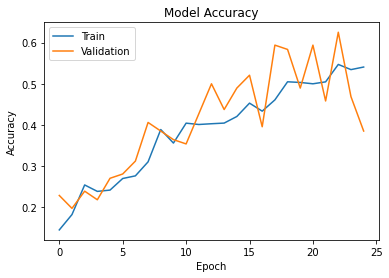

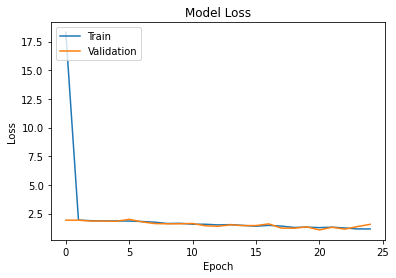

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

## **2. Classification Report and Confusion Matrix** 

In [ ]:
# Source: https://stackoverflow.com/questions/51282098/plotting-confusion-matrix-for-an-image-classification-model/51282672

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

target_names = image_folder
Y_pred = model.predict_generator(valid_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Printing the classification report
print('Classification Report')
print(metrics.classification_report(valid_generator.classes, y_pred))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Classification Report
              precision    recall  f1-score   support

           0       0.04      0.02      0.02        62
           1       0.13      0.16      0.14        58
           2       0.14      0.12      0.13        48
           3       0.13      0.06      0.09        47
           4       0.08      0.04      0.05        54
           5       0.12      0.09      0.10        64
           6       0.11      0.31      0.16        51

    accuracy                           0.11       384
   macro avg       0.11      0.11      0.10       384
weighted avg       0.10      0.11      0.10       384



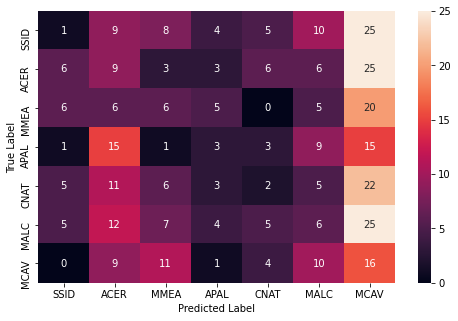

In [ ]:
# Visualizing the confusion matrix
import seaborn as sns

f, ax = plt.subplots(figsize = (8,5))
sns.heatmap(confusion_matrix(valid_generator.classes, y_pred), annot = True, fmt = '.0f', ax = ax)
ax.set_xticklabels(image_folder)
ax.set_yticklabels(image_folder)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **V. CONVERT SAVED MODEL TO TFLITE**

To deploy this on Native app, you need to convert it to file format .tflite.

In [ ]:
# Load the model
new_model= tf.keras.models.load_model(filepath = 'coral-baseline.h5')

# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = converter.convert()

# Save the TFLite model
with tf.io.gfile.GFile('coral-baseline.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpa4smr2dc/assets
